In [145]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [146]:
df=sns.load_dataset('titanic') 

In [147]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [148]:
df.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [149]:
X=df.drop(labels=['fare','class','adult_male','deck','embark_town','alive','alone','survived','who'],axis=1)

In [150]:
Y=df['survived']

In [151]:
X

,pclass,sex,age,sibsp,parch,embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,NaN,1,2,S
889,1,male,26.0,0,0,C


In [152]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [153]:
X.isnull().sum()

pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
dtype: int64

In [154]:
X['age'].fillna((X['age'].mean()),inplace=True)

In [155]:
X['embarked'].fillna(X['embarked'].mode(),inplace=True)

In [156]:
X.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    2
dtype: int64

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
le=LabelEncoder()

In [159]:
le.fit(X['embarked'])
X['embarked']=le.transform(X['embarked'])
le.fit(X['sex'])
X['sex']=le.transform(X['sex'])

In [160]:
X

,pclass,sex,age,sibsp,parch,embarked
0,3,1,22.000000,1,0,2
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,2
3,1,0,35.000000,1,0,2
4,3,1,35.000000,0,0,2
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,2
887,1,0,19.000000,0,0,2
888,3,0,29.699118,1,2,2
889,1,1,26.000000,0,0,0


In [161]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [162]:
bestFeatures = SelectKBest(score_func=chi2, k='all')
fit = bestFeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['features','score']

In [163]:
featureScores

,features,score
0,pclass,30.873699
1,sex,92.702447
2,age,24.687926
3,sibsp,2.581865
4,parch,10.097499
5,embarked,9.755456


In [164]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

[0.13338107 0.3414067  0.36629069 0.06627523 0.05215689 0.04048942]


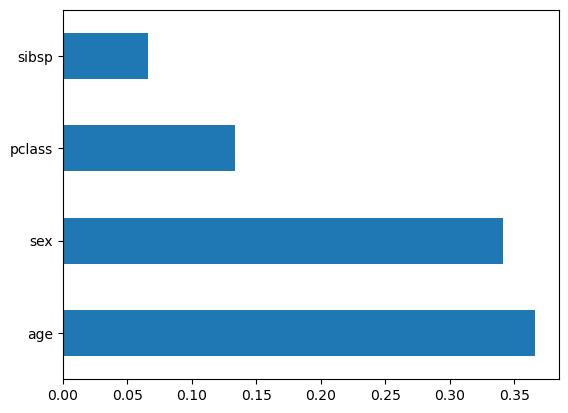

In [165]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [166]:
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import SMOTE
oversample= SMOTE(random_state=7)
X,Y=oversample.fit_resample(X,Y)
print(Counter(Y))

Counter({0: 549, 1: 342})
Counter({0: 549, 1: 549})


In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [168]:
rfc=RandomForestClassifier()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [169]:
y_pred=rfc.predict(X_test)

In [170]:
print(accuracy_score(Y_test,y_pred))

0.8227272727272728


In [172]:
user_input=np.array([[3,1,22.00000,1,0,2]])
y_pred=rfc.predict(user_input)
print(y_pred)
if y_pred==0:
    print("Not Survived")
else:
    print("Survived")

[0]
Not Survived


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
